#STAT 201 Project Proposal

##Introduction

There has been considerable debate regarding the effects of prominent alcohol use on academic performance, such as GPA. While it is challenging to create a direct causal link between the two variables, those within academia have attempted to obtain metrics related to academic performance. Research from the American Economist Journal has suggested that drinking in high school positively correlates with absenteeism rates (Austin, 2012). Furthermore, regarding absenteeism and academic performance, findings presented by the American Educational Research Association indicate that "overall absences are negatively associated with academic achievement" (Klein et al., 2022). While results within academia have shown the link between drinking and absenteeism (and ultimately academic performance), little is known regarding whether or not the timing of drinking affects if students are absent from class. Since school takes place on weekdays, weekday drinking could result in more school absences than weekend drinking. In this project, we would like to explore using the techniques covered in STAT 201. We will utilize a dataset from Kaggle that examines students' academic and socioeconomic attributes across two Portuguese secondary schools ("https://www.kaggle.com/code/marcdeveaux/student-alcohol-consumption/data"). The data set includes the following information that will be utilized in our research (Chauhan, 2022): 
- Workday alcohol consumption - <code>Dalc</code>
- Weekend alcohol consumption - <code>Walc</code>
- Number of school absences - <code>absences</code>

In this case, the number of school absences will serve as our response variable. We will use the mean of our response variable as the parameter and standard deviation as the scale parameter. Considering that the data only measures these variables across two schools in Portugal, our group will utilize both bootstrapping and asymptotics to generate a sampling distribution to mimic the population distribution of all schools in Portugal. The findings of both methods will then be compared with one another. Finally, hypothesis testing will be conducted to answer the research question we mentioned before. Our null hypothesis is that increased levels of weekday alcohol consumption will result in the same amount of school absences as increased alcohol consumption on the weekends. In contrast, our alternative hypothesis, as suggested by our group's aforementioned assumptions by findings from the American Economist Journal (Austin, 2012), is that increased levels of weekday alcohol consumption will result in a higher level of absenteeism compared to increased levels of weekend alcohol consumption. 

##Preliminary Results

We can read the dataset into R using Libraries and read_csv. Then, we clean the data by choosing the columns we are interested in and filtering out any NA rows. We also change column Dalc to workday_ac and column Walc to weekend_ac to clarify the data. 

In [1]:
# Loading libraries and packages
library(infer)
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.1     ✔ rsample      1.1.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ modeldata    1.0.1     ✔ workflows    1.0.0
✔ parsnip      1.0.1     ✔ workflowsets 1.0.0
✔ recipes      1.0.1     ✔ yardstick    1.1.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipe

First we loaded our data from the web. Since we were given a lot of columns to work with, we only selected the columns that we will be working with (workday_ac, weekend_ac, absences) . 

In [2]:
# Read the data off the web
alcohol_data <- read_csv("https://raw.githubusercontent.com/riddhibattu/STAT201/main/Maths.csv") 
 
head(alcohol_data)

Rows: 395 Columns: 33
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (17): school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardi...
dbl (16): age, Medu, Fedu, traveltime, studytime, failures, famrel, freetime...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [3]:
# Select columns we will need to work with and we drop empty rows
alcohol_data <- alcohol_data %>%
mutate(workday_ac = Dalc) %>%
mutate(weekend_ac = Walc) %>%
select('workday_ac', 'weekend_ac', 'absences') %>%
drop_na() 
 
head(alcohol_data)

workday_ac,weekend_ac,absences
<dbl>,<dbl>,<dbl>
1,1,6
1,1,4
2,3,10
1,1,2
1,2,4
1,2,10


Note: <code>Dalc = workday_ac</code> and 
      <code>Walc = weekend_ac</code>

For this project, we only took into consideration of alcohol consumption rating (1-5) greater than two since we assumed the moderate and above amount of alcohol consumption would cause a difference. Therefore, we filter out any workday alcohol consumption and weekend alcohol consumption that are equal to or lower than 2. 
 
In order to properly display the two drinker types (weekend and workday) as categorical variables, we need to merge the data under one column. We will name this column ‘drinker_type’. 

In [4]:
# We filter the data to only show the absences of drinkers that have a workday drinking score of greater than 2
workday_filtered_sample <- alcohol_data %>%
    filter(workday_ac > 2) %>%
    mutate(absences_of_workday_drinkers = absences) %>%
    select('absences_of_workday_drinkers')
workday_filtered_sample

absences_of_workday_drinkers
<dbl>
16
0
6
⋮
3
0
5


In [5]:
# Filter the data to only show the absences of drinkers that have a weekend drinking score of greater than 2
weekend_filtered_sample <- alcohol_data %>%
    filter(weekend_ac > 2) %>%
    mutate(absences_of_weekend_drinkers = absences) %>%
    select('absences_of_weekend_drinkers')
weekend_filtered_sample

absences_of_weekend_drinkers
<dbl>
10
2
16
⋮
3
0
5


In [6]:
# Merging the 2 filtered data tables to have the drinker_type category and number of absences
merged_data <- as.data.frame(bind_rows(workday_filtered_sample,weekend_filtered_sample)) %>%
    mutate(workday = absences_of_workday_drinkers) %>%
    mutate(weekend = absences_of_weekend_drinkers) %>%
    pivot_longer(cols = workday:weekend,
                names_to = "drinker_type",
                values_to = "absences") %>%
    select("drinker_type", "absences") %>%
    drop_na()
merged_data

drinker_type,absences
<chr>,<dbl>
workday,16
workday,0
workday,6
⋮,⋮
weekend,3
weekend,0
weekend,5


Once we have cleaned our data, we calculate the mean and standard deviation of the weekend and workday drinkers.

In [7]:
# Calculate mean and sd
data_for_drinker_type <- merged_data %>%
    group_by(drinker_type) %>%
    summarise(mean = mean(absences, na.rm = TRUE),
              sd = sd(absences, na.rm = TRUE),
             se = sd/sqrt(length(drinker_type)))
data_for_drinker_type

drinker_type,mean,sd,se
<chr>,<dbl>,<dbl>,<dbl>
weekend,7.119497,8.322126,0.6599875
workday,7.886364,6.138767,0.9254540


We then calculated the sample difference in mean for later comparisons.

In [8]:
# Calculate Population Mean Difference
diff_in_mean <- data_for_drinker_type$mean[2] - data_for_drinker_type$mean[1]
diff_in_mean

[1] 0.7668668

We then plotted a box plot to compare the number of absences between the weekend and workday consumption categories. The graph's purpose is to visualize the difference between their means. We also plotted a bar graph to focus more on the means of the two categories. 

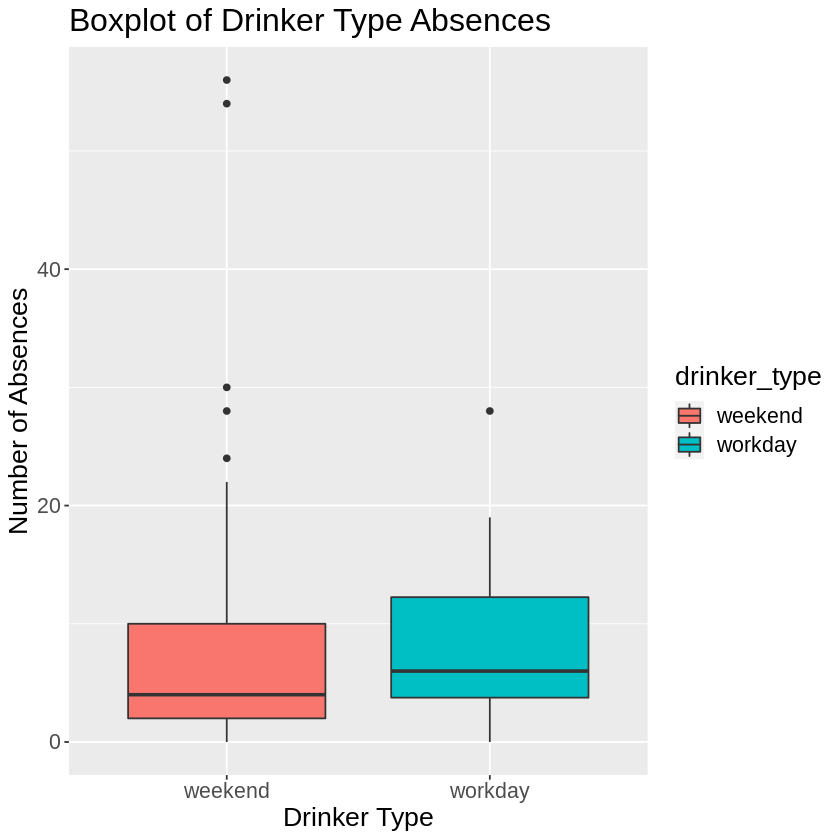

In [21]:
# Box plot to compare Weekend and Weekday drinker's absences
drinkers_absence_boxplots <- merged_data %>% 
    ggplot(aes(drinker_type, absences, fill=drinker_type)) +
    geom_boxplot() +
    theme(text = element_text(size = 16)) +
    ggtitle("Boxplot of Drinker Type Absences") + 
    xlab("Drinker Type") + 
    ylab("Number of Absences")
drinkers_absence_boxplots

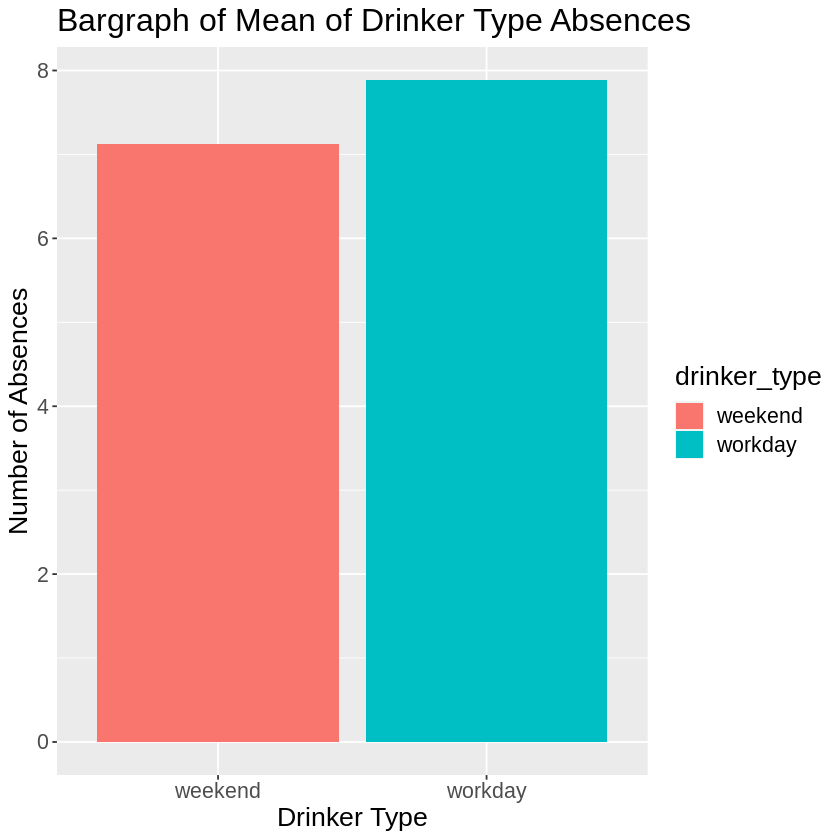

In [23]:
# Bar graph to help compare the mean of two categories 
drinker_absence_bargraph<- data_for_drinker_type %>%
    ggplot(aes(drinker_type, mean, fill=drinker_type)) +
    geom_bar(stat = "identity") +
    theme(text = element_text(size = 16)) +
    ggtitle("Bargraph of Mean of Drinker Type Absences") + 
    xlab("Drinker Type") + 
    ylab("Number of Absences")
drinker_absence_bargraph

With the two plots, we can see how the mean weekday and weekend and total absences have a very close mean. This implies that our null hypothesis would be true, which can be tested with a hypothesis test using the mean and the standard deviation.

##Methods and Results

We are using the dataset from UCI Machine Learning Repository, a trustworthy source for datasets. Therefore, the dataset is complete, valid, and reliable for our project. 

The plots above indicate that our null hypothesis could be true if the mean absence due to workday alcohol consumption is equal to the mean absence due to weekend alcohol consumption. However, to decide whether we can reject or fail to reject our hypothesis, we need to do a hypothesis test with the bootstrap method and asymptotic approach to verify using mean and standard deviation along with a student t-test.


1. $H_0: \mu_{workday_{ac}} = \mu_{weekday_{ac}} $
2. $H_A: \mu_{workday_{ac}} \neq \mu_{weekday_{ac}} $

We will use both bootstrap methods to resample for the null distribution: the absence of students who consume minimum alcohol. Then, we will use an asymptotic approach to calculate the 95% confidence interval for the mean. We can use an asymptotic approach because the size of our data is large enough, the samples are taken independently, and the estimator used is random.

In this project, we expect to use the hypothesis test to find if there is a correlation between alcohol consumption and student attendance. The purpose of this project is to help students find out if there is such a correlation. If yes, students can refer to the result for a better work-life balance plan. In the future, we can test if there is a correlation between student attendance and academic success to investigate further the correlation between drinking and students’ academic performance.



###Hypothesis Test

In [11]:
# We used the infer package to calculate the test statistic (difference in means)
set.seed(5555)
obs_diff_in_means <- merged_data %>%
    specify(formula = absences ~ drinker_type) %>%
    calculate(stat = 'diff in means', order = c('workday', 'weekend'))
obs_diff_in_means

stat
<dbl>
0.7668668


In [12]:
# Generate 1000 samples from the null distribution
set.seed(5555)
null_diff_in_means <- merged_data %>% 
   specify(formula = absences ~ drinker_type) %>% 
   hypothesize(null = "independence") %>% 
   generate(reps = 1000, type = "permute") %>% 
   calculate(stat="diff in means", order = c('workday', 'weekend'))
head(null_diff_in_means)

replicate,stat
<int>,<dbl>
1,-0.68396226
2,0.67981704
3,0.18653516
4,-0.07461407
5,-2.27987421
6,-0.45182962


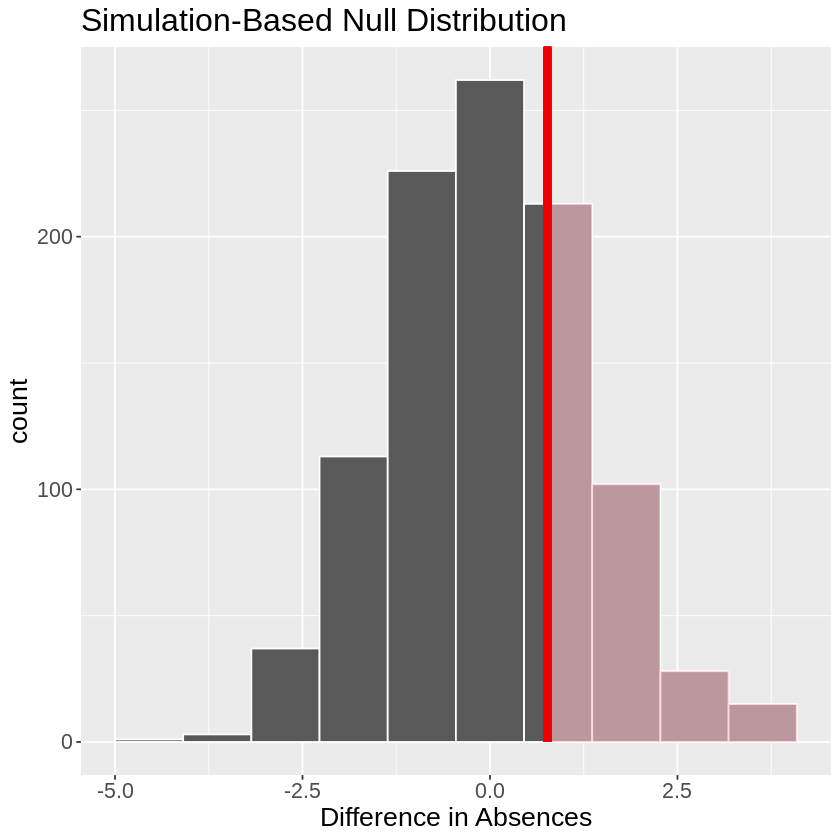

In [25]:
# Plot the result of the hypothesis test to visualize with 10 bins, put a vertical bar for the observed test statistic obs_diff_in_medians, and shade the tail(s).
diff_in_means_plot <- null_diff_in_means %>%
   visualize(bins=10) + 
   shade_p_value(obs_stat = obs_diff_in_means, direction = "right") +
   xlab("Difference in Absences") +
    theme(text = element_text(size = 16))
diff_in_means_plot

In [14]:
#Calculate the p-value
p_value <- null_diff_in_means %>%
    get_p_value(obs_stat = obs_diff_in_means, direction = "right") 
p_value

p_value
<dbl>
0.267


We obtain a p-value of 0.267, which is greater than the alpha value, 0.05. In this case, we fail to reject the null hypothesis. With our test results, we conclude that the mean absence due to workday alcohol consumption is equal to the mean absence due to weekend alcohol consumption.

###Calculating Confidence Interval using CLT

We graph the sample distribution for the drinker types to visualize what we’re working with. Then, using the central limit theorem, we obtain the 95% confidence interval for the difference of means using the following formula:
$$
\bar{X}_1-\bar{X}_2\sim N\left(\mu_1 - \mu_2, \sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}\right)
$$

We can also calculate the confidence interval using the following formula:
$$
CI\left(\mu_1 - \mu_2\right) = \left(\bar{X}_1-\bar{X}_2\right) \pm z^*\sqrt{\frac{s^2_1}{n_1}+\frac{s^2_2}{n_2}}
$$

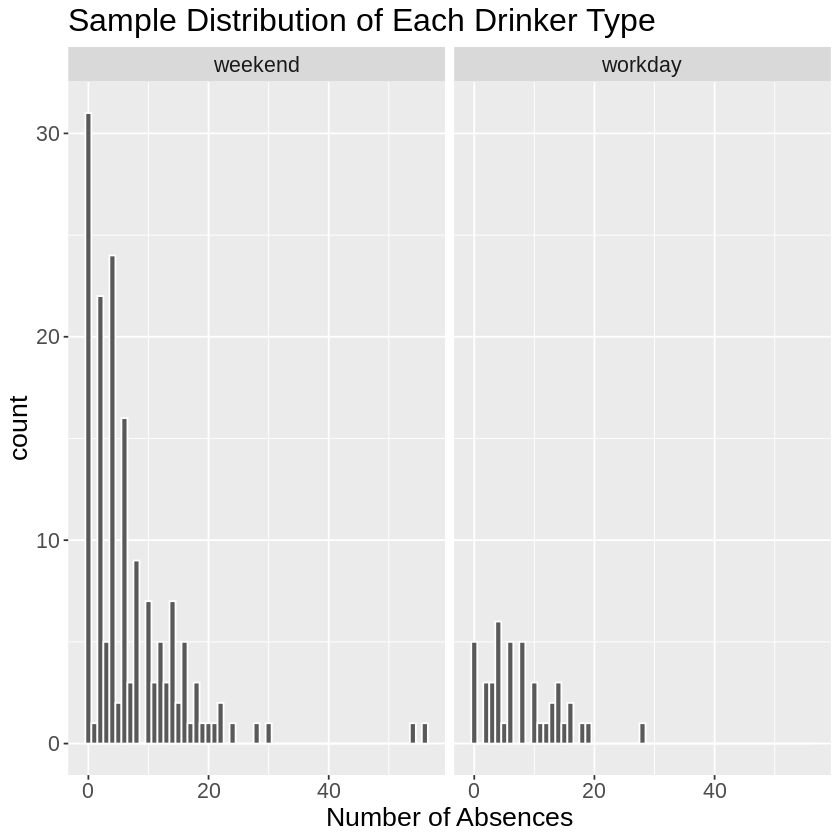

In [26]:
# Check the sample distribution of each drinker type
set.seed(5555)
drinker_samp_dist_plot <- merged_data %>% 
    ggplot() + 
    geom_histogram(aes(x=absences), binwidth = 1, color = 'white') +
    facet_wrap(~ drinker_type) + 
    ggtitle('Sample Distribution of Each Drinker Type') +
    xlab('Number of Absences') +
    theme(text = element_text(size = 16))
drinker_samp_dist_plot

In [16]:
# Obtain a 95% confidence interval for the difference between the means of Weekend Drinkers and Workday Drinkers' absences using the CLT.
set.seed(5555)
weekend_mean <- data_for_drinker_type$mean[1]
weekend_var <- data_for_drinker_type$se[1]
workday_mean <- data_for_drinker_type$mean[2]
workday_var <- data_for_drinker_type$se[2]

In [17]:
parking_clt_ci <- 
    tibble(lower_ci = workday_mean - weekend_mean - qnorm(0.975) * sqrt(workday_var/length(workday_var) + weekend_var/length(weekend_var)),
           upper_ci = workday_mean - weekend_mean + qnorm(0.975) * sqrt(workday_var/length(workday_var) + weekend_var/length(weekend_var)))
head(parking_clt_ci)

lower_ci,upper_ci
<dbl>,<dbl>
-1.701008,3.234742


We obtained a confidence interval using CLT; now, we use bootstrapping to get a confidence interval and compare it to our first confidence interval. 

###Calculating Confidence Interval using Bootstrap

We generate a bootstrap sample distribution of 1000 reps for the difference in means. With the distribution created, we can obtain a 95% confidence interval. We follow it up by visualizing the bootstrap distribution with the confidence interval. 

In [18]:
# Make a bootstrap distribution for difference in means
set.seed(5555)
bootstrap_sample_dist <- merged_data %>%
    specify(explanatory = drinker_type, response = absences) %>%
    generate(reps=1000, type = 'bootstrap')  %>%
    calculate(stat = 'diff in means', order = c("workday", "weekend")) 
bootstrap_sample_dist

replicate,stat
<int>,<dbl>
1,0.1280809
2,1.9821221
3,0.3459119
⋮,⋮
998,-0.5718157
999,-1.6750000
1000,0.5551724


In [19]:
# Obtain a 95% condidence interval for the bootstrap distribution
set.seed(5555)
perct_bootstrap_ci <- bootstrap_sample_dist %>%
                get_ci(level=0.95, type = "percentile")
perct_bootstrap_ci

lower_ci,upper_ci
<dbl>,<dbl>
-1.435494,2.968837


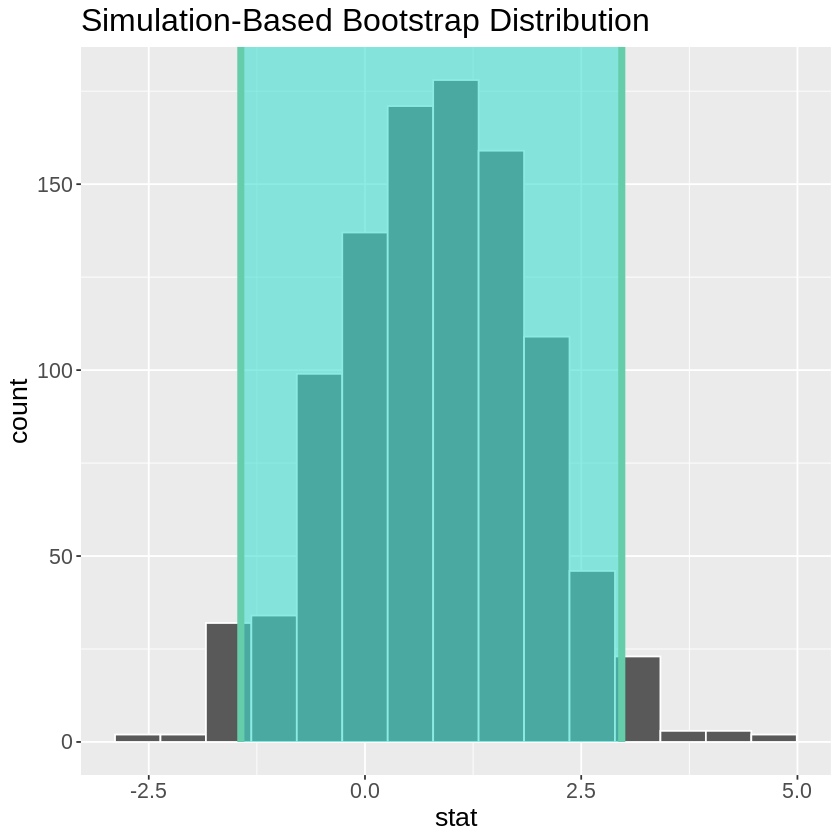

In [27]:
# Visualizing the bootstrap distribution
set.seed(5555)
bootstrap_sample_dist_graph <- merged_data %>%
    specify(explanatory = drinker_type, response = absences) %>%
    generate(reps=1000, type = 'bootstrap')  %>%
    calculate(stat = 'diff in means', order = c("workday", "weekend"))%>%
    visualize() + shade_ci(endpoints = perct_bootstrap_ci) +
    theme(text = element_text(size = 16))
bootstrap_sample_dist_graph

##Discussion

We calculated the confidence interval of the difference in mean using both CLT and bootstrap methods. 
Using CLT, we obtain a 95% confidence interval between -1.701 and 3.235 (rounded to 3 decimals). Therefore, through the CLT approach, we are 95% confident that the true difference between the mean absence due to workday alcohol consumption and the mean absence due to weekend alcohol consumption falls in this interval. In other words, across all 95% confidence intervals that could be calculated for the difference between the mean absence due to workday alcohol consumption and the mean absence due to weekend alcohol consumption, we can expect that 95% of the intervals contain the true difference in mean. 
Using the bootstrap approach, we obtain a 95% confidence interval between -1.136 and 2.969 (rounded to 3 decimals). Therefore, through the bootstrap approach, we are 95% confident that the true difference between the mean absence due to workday alcohol consumption and the mean absence due to weekend alcohol consumption falls in this interval. In other words, across all 95% confidence intervals that could be calculated for the difference between the mean absence due to workday alcohol consumption and the mean absence due to weekend alcohol consumption, we can expect that 95% of the intervals contain the true difference in mean. 

Our sample's mean difference is 0.767(rounded to 3 decimals). Using both approaches, we generated two intervals that capture the sample's mean difference.

From our hypothesis test, we obtain a p-value of 0.267, greater than the significance level of 0.05. Thus, we fail to reject the null hypothesis. Therefore, we conclude with the null hypothesis that the mean absence due to workday alcohol consumption equals the mean absence due to weekend alcohol consumption.

We expected the mean absence due to workday alcohol consumption would be different from the mean absence due to weekend alcohol consumption. In other words, we expected to reject our hypothesis test. However, since our p-value is greater than the alpha value, we could not reject our hypothesis test. We think our result does not meet our expectations because our sample for the weekend and weekday drinkers is not independent, meaning that a person who drinks on weekends and weekdays would be represented as two different variables. Therefore our p-value is too significant for us to reject the null hypothesis.

Besides the potential error we might make, further studies can be carried out to explore alcohol's effects on students' academic performance. We can extend the analysis to a worldwide population rather than just focusing on the Portugal population for a more generalized conclusion.

##Reference

Austin, W. A. (2012). THE EFFECTS OF ALCOHOL USE ON HIGH SCHOOL ABSENTEEISM. 
    American Economist, 57(2), 238-252. 
    Retrieved from https://www.proquest.com/scholarly-journals/effects-alcohol-use-on-high-school-absenteeism/docview/1113789486/se-2

Chauhan, A. (2022, September 15). Alcohol effects on study. Kaggle. 
    Retrieved November 4, 2022, from https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study 

Klein, M., Sosu, E. M., & Dare, S. (2022). School Absenteeism and Academic Achievement: Does the Reason for Absence Matter? 
    AERA Open, 8. https://doi.org/10.1177/23328584211071115